In [1]:
import pandas as pd
from prophet import Prophet
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

In [2]:
df = pd.read_csv('datasets/nyc_taxi_trip_duration.csv')

In [3]:
df['date'] = pd.to_datetime(df.pickup_datetime).dt.date

In [4]:
df = df.groupby('date', as_index=False)['id'].count().rename(columns={'date': 'ds', 'id': 'y'})
df['ds'] = pd.to_datetime(df['ds'])

In [5]:
m = Prophet()

In [6]:
m.fit(df)

03:40:02 - cmdstanpy - INFO - Chain [1] start processing
03:40:02 - cmdstanpy - INFO - Chain [1] done processing


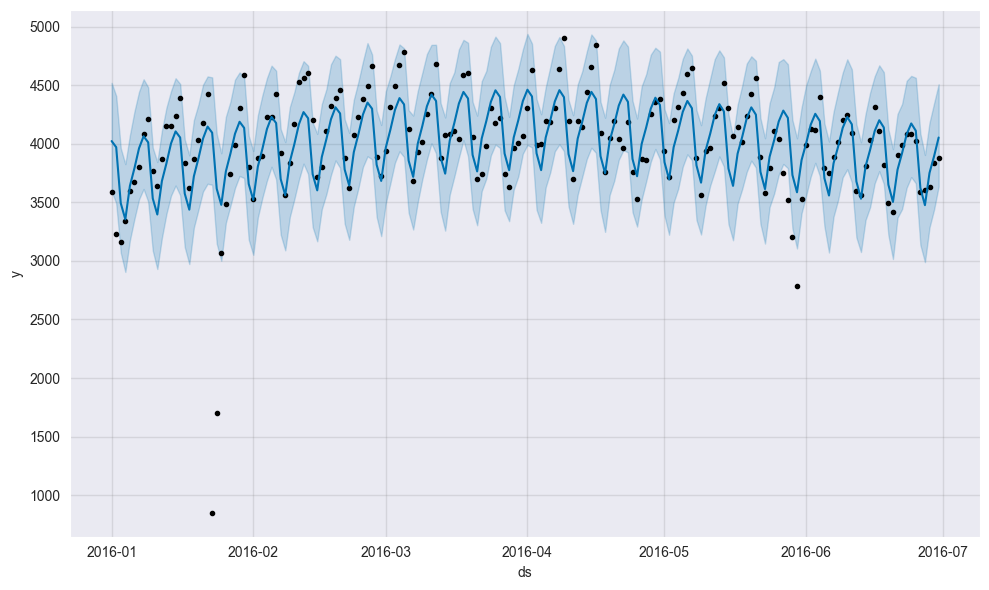

In [7]:
forecast = m.predict(df)
m.plot(forecast);

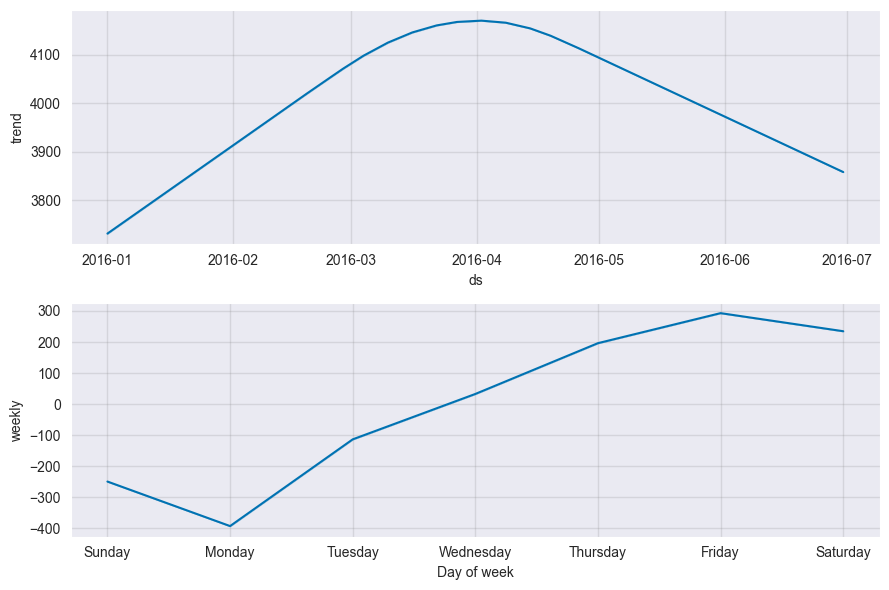

In [8]:
m.plot_components(forecast);

In [10]:
performance = pd.merge(df, forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']], on='ds')  # Check MAE value
performance_MAE = mean_absolute_error(performance['y'], performance['yhat'])
print(f'The MAE for the model is {performance_MAE}')  # Check MAPE value
performance_MAPE = mean_absolute_percentage_error(performance['y'], performance['yhat'])
print(f'The MAPE for the model is {performance_MAPE}')

The MAE for the model is 197.0867273741758
The MAPE for the model is 0.0695639235746175


In [11]:
performance['anomaly'] = performance.apply(
    lambda rows: 1 if ((rows.y < rows.yhat_lower) | (rows.y > rows.yhat_upper)) else 0, axis=1)


In [12]:
performance

,ds,y,yhat,yhat_lower,yhat_upper,anomaly
0,2016-01-01,3588,4023.839599,3597.086574,4521.123079,1
1,2016-01-02,3228,3971.482433,3492.906898,4409.373381,1
2,2016-01-03,3158,3492.943814,3070.702262,3963.182566,0
3,2016-01-04,3341,3355.346935,2905.889834,3827.094065,0
4,2016-01-05,3595,3640.679477,3176.392939,4074.063417,0
...,...,...,...,...,...,...
177,2016-06-26,3590,3623.745684,3137.548533,4087.264035,0
178,2016-06-27,3602,3476.335750,2989.982723,3904.850652,0
179,2016-06-28,3632,3751.855237,3286.421405,4180.123478,0
180,2016-06-29,3838,3894.241936,3439.350570,4346.518742,0


<Axes: xlabel='ds', ylabel='y'>

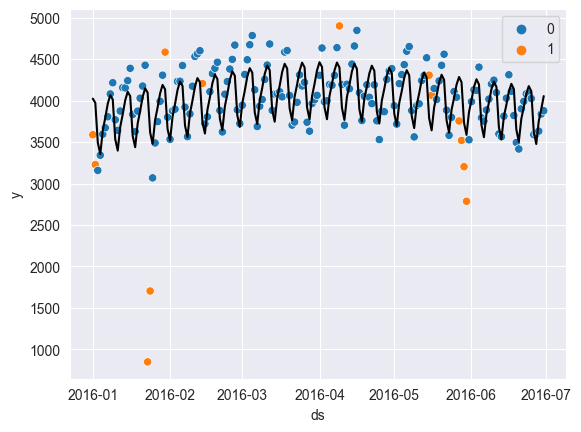

In [13]:
sns.scatterplot(x='ds', y='y', data=performance, hue='anomaly')
sns.lineplot(x='ds', y='yhat', data=performance, color='black')

In [39]:
def find_anomaly_days(df: pd.DataFrame, column_date: str = 'date', column_id: str = 'id') -> pd.Series:
    df = df.groupby(column_date, as_index=False)[column_id].count().rename(
        columns={column_date: 'ds', column_id: 'y'})
    df['ds'] = pd.to_datetime(df['ds'])
    m = Prophet()
    m.fit(df)
    forecast = m.predict(df)
    performance = pd.merge(df, forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']], on='ds')
    performance['anomaly'] = performance.apply(
        lambda rows: 1 if ((rows.y < rows.yhat_lower) | (rows.y > rows.yhat_upper)) else 0, axis=1)
    return performance[performance.anomaly == 1].iloc[:, 0]


In [42]:
df = pd.read_csv('datasets/nyc_taxi_trip_duration.csv')
df['date'] = pd.to_datetime(df.pickup_datetime).dt.date
find_anomaly_days(df)

03:51:00 - cmdstanpy - INFO - Chain [1] start processing
03:51:00 - cmdstanpy - INFO - Chain [1] done processing


1     2016-01-02
22    2016-01-23
23    2016-01-24
29    2016-01-30
44    2016-02-14
99    2016-04-09
106   2016-04-16
135   2016-05-15
147   2016-05-27
148   2016-05-28
149   2016-05-29
150   2016-05-30
Name: ds, dtype: datetime64[ns]

Object `m.train_holiday_names()` not found.
